# Computerphysik Programmiertutorial 5b
Prof. Dr. Matteo Rizzi und Dr. Markus Schmitt - Institut für Theoretische Physik, Universität zu Köln
&nbsp;

**Github**: [https://github.com/markusschmitt/compphys2021](https://github.com/markusschmitt/compphys2021)

**Inhalt dieses Notebooks**: Timing (`BenchmarkTools`), Komplexität


## Timing

Bei wissenschaftlichen Programmen kommt es oft auf die Effizienz an. Um die zu optimieren ist es wichtig die Resourcen bestimmen zu können, die zum Ausführen des Programms benötigt werden. Die wichtigen Resourcen sind Speicherplatz und Laufzeit. Wir werden uns hier auf Zeitmessungen beschränken.

In [ ]:
function f(x)
    for j in eachindex(x)
        x[j] += 3.7
    end

    return nothing
end

Das Makro `@time` wird einem Funktionsaufruf vorangestellt um eine Ausgabe der verwendeten Resourcen zu erhalten:

In [ ]:
@time f(rand(10000))

Achtung: Der erste Funktionsaufruf dauert länger, weil die Funktion dann [just-in-time-kompiliert](https://de.wikipedia.org/wiki/Just-in-time-Kompilierung) (jit-kompiliert) wird.

In [ ]:
@time f(rand(10000))

`@elapsed` gibt nur die Laufzeit (in Sekunden) zurück.

In [ ]:
@elapsed f(rand(10000))

Mit dem Paket `BenchmarkTools` können genauere Messungen vorgenommen werden

In [6]:
using BenchmarkTools

In [ ]:
@btime f(rand(10000))

In [ ]:
@belapsed f(rand(10000))

## Komplexität

In [2]:
using Plots
using LinearAlgebra

Zur Anschauung definieren wir eine eigene Funktion für Matrixmultiplikation:

In [3]:
function my_matmul(A,B)
    C = Array{Float64}(undef,size(A)[1], size(B)[2])

    for j in 1:size(C)[2]
        for i in 1:size(C)[1]
            C[i,j] = 0.0
            for k in 1:size(A)[2]
                C[i,j] += A[i,k] * B[k,j]
            end
        end
    end

    return C
end

my_matmul (generic function with 1 method)

In [7]:
A = rand(100,100)
B = rand(100,100)

isapprox(my_matmul(A,B), A*B)

true

Benchmark unserer Funktion:

In [11]:
@btime my_matmul(A,B);

  622.583 μs (2 allocations: 78.17 KiB)


Benchmark der vorimplementierten Matrixmultiplikation:

In [10]:
@btime A*B;

  32.291 μs (2 allocations: 78.17 KiB)


Schauen wir uns das etwas systematischer für verschiedene Matrixgrößen an:

In [12]:
BLAS.set_num_threads(1);

ns=2 .^ (collect(5:10))

times1=Float64[]
times2=Float64[]

for n in ns
    # zwei Matrizen erstellen
    A=rand(n,n)
    B=rand(n,n)
    
    # Zeit für Multiplikation messen
    t1 = @elapsed A*B
    t2 = @elapsed my_matmul(A,B)
    
    # Ausgabe
    println("n=$n:")
    println("  Zeit für A*B: $(t1)s")
    println("  Zeit für my_matmul(A,B): $(t2)s")
    
    # Messergebnis an Arrays anhängen
    push!(times1, t1)
    push!(times2, t2)
end

n=32:
  Zeit für A*B: 0.000459458s
  Zeit für my_matmul(A,B): 1.775e-5s
n=64:
  Zeit für A*B: 1.7875e-5s
  Zeit für my_matmul(A,B): 0.00014725s
n=128:
  Zeit für A*B: 0.000104875s
  Zeit für my_matmul(A,B): 0.001595708s
n=256:
  Zeit für A*B: 0.000749375s
  Zeit für my_matmul(A,B): 0.01441775s
n=512:
  Zeit für A*B: 0.006995792s
  Zeit für my_matmul(A,B): 0.1519315s
n=1024:
  Zeit für A*B: 0.045516958s
  Zeit für my_matmul(A,B): 1.744763416s


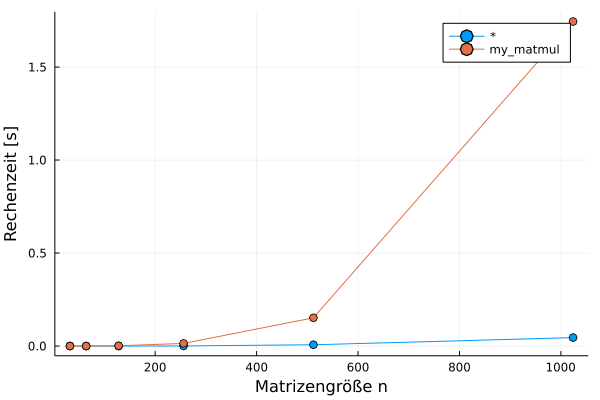

In [13]:
plot(ns,times1, marker=:o, label="*")
plot!(ns,times2, marker=:o, label="my_matmul")
xlabel!("Matrizengröße n")
ylabel!("Rechenzeit [s]")

Die **Komplexität** eines Algorithmus gibt an wie die benötigten *Rechenresourcen* (Rechenzeit oder Speicherplatz) wachsen, wenn man das zu lösende Problem vergrößert. In unserem Beispiel ist die entspricht die Größe des Problems der Größe unserer $n\times n$-Matrizen.

Um eine Gesetzmäßigkeit zu finden, schauen wir noch einmal genauer hin, indem wir doppelt-logarithmisch plotten:

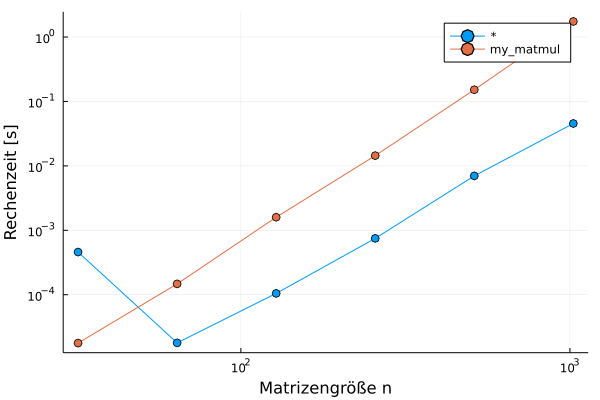

In [15]:
plot(ns,times1, marker=:o, xaxis=:log, yaxis=:log, label="*")
plot!(ns,times2, marker=:o, xaxis=:log, yaxis=:log, label="my_matmul")
xlabel!("Matrizengröße n")
ylabel!("Rechenzeit [s]")

Die Komplexität von Algorithmen wird in $O$-Notation angegeben. Die Multiplikation von zwei $n\times n$ Matrizen wie wir sie hier implementiert haben ist z.B. $O(n^3)$. Das bedeutet, dass die Rechenzeit bei großen Matrizen kubisch wächst. Der Vorfaktor dieses Wachstumsgesetzes kann jedoch von den Details der Implementierung abhängen.

Eine Zusammenfassung der Komplexität bekannter Algorithmen steht auf [Wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra).

In [16]:
ns=2 .^ (collect(5:10))
times1=Float64[]
times2=Float64[]

for n in ns
    # Matrix und Vektor erstellen
    A=rand(n,n)
    B=rand(n,1) # Diesmal Matrix-Vektor Produkt
    
    # Zeit für Multiplikation messen
    t1 = @elapsed A*B
    t2 = @elapsed my_matmul(A,B)
    
    # Ausgabe
    println("n=$n:")
    println("  Zeit für A*B: $t1")
    println("  Zeit für my_matmul(A,B): $t2")
    
    # Messergebnis an Arrays anhängen
    push!(times1, t1)
    push!(times2, t2)
end

n=32:
  Zeit für A*B: 9.708e-6
  Zeit für my_matmul(A,B): 3.083e-6
n=64:
  Zeit für A*B: 4.959e-6
  Zeit für my_matmul(A,B): 4.5e-6
n=128:
  Zeit für A*B: 1.3e-5
  Zeit für my_matmul(A,B): 2.275e-5
n=256:
  Zeit für A*B: 4.0459e-5
  Zeit für my_matmul(A,B): 0.000103291
n=512:
  Zeit für A*B: 0.000164125
  Zeit für my_matmul(A,B): 0.000497166
n=1024:
  Zeit für A*B: 0.000673417
  Zeit für my_matmul(A,B): 0.002109584


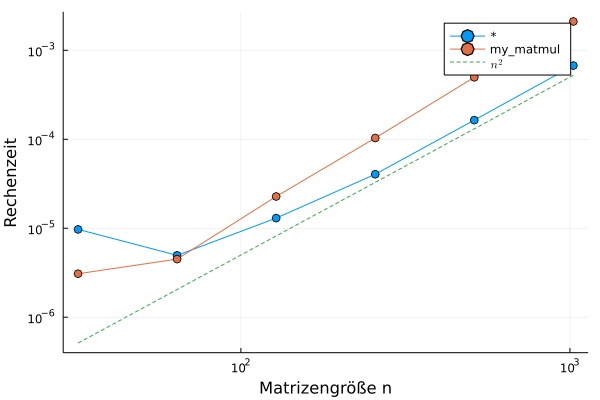

In [27]:
using LaTeXStrings

plot(ns,times1, marker=:o, xaxis=:log, yaxis=:log, label="*")
plot!(ns,times2, marker=:o, xaxis=:log, yaxis=:log, label="my_matmul")
plot!(ns, 5e-10*ns.^2, linestyle=:dash, xaxis=:log, yaxis=:log, label=L"n^2")
xlabel!("Matrizengröße n")
ylabel!("Rechenzeit")